In [1]:
# Por si alguien corre en python2
from __future__ import division

import math
import numpy as np
import pandas as pd
from scipy.stats import binom, beta, uniform, norm, bernoulli, dirichlet

from matplotlib import pyplot as plt
%matplotlib inline

# Ejercicio 1

a. Explicar este chiste

<img src="https://imgs.xkcd.com/comics/frequentists_vs_bayesians.png"
     alt="Chiste XKCD"
     style="float: left; margin-right: 10px;" />


b. Escribir el teorema de Bayes para este problema y hacer un dibujo esquemático del prior y de la verosimilitud.

c. ¿Cómo cambiaría el remate del chiste si el detector tuviera 1000 dados en lugar de dos, y si solo mintiera en el caso en el que sale seis en todos ellos? (<b>opcional</b>: modificar el archivo de la imagen con el nuevo final, y postearlo con el hashtag #frec_bayes)

***

b) Recordando el teorema de Bayes:

$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$

Necesitamos identificar cada término. A es la proposición cuya probabilidad queremos determinar, mientras B es la proposición que condiciona a A. En otras palabras, $A =$ el sol explotó y $B =$ el detector dice que el sol explotó.

Sin embargo, y como dice el chiste, esto no cuenta toda la historia. Nos falta un poco de información. En efecto, podriamos escribir el teorema de Bayes como:

$P(A|B,I) = \frac{P(B|A,I)P(A,I)}{P(B,I)}$

¿Y cuál es esa información? Qué es muy poco probable que el sol explote. Eso al detector mucho no le importa, así que podemos escribir

$P(A|B,I) = \frac{P(B|A)P(A,I)}{P(B)}$

¿Cómo incorporo entonces la información al problema? La puedo poner en el prior. De esa manera, puedo decir que

$P(A) = P($el sol explotó$) = \epsilon$, con $\epsilon \ll 1$

La verosimilitud puede calcularse entonces como:

$P(B|A) = 1-(1/6)^{2} = 35/36$

Y la probabilidad total de que el detector indique que el sol explotó es 

$P(B) = P(B|A)P(A)+P(B|-A)P(-A) = \frac{35}{36}\epsilon+\frac{1}{36}(1-\epsilon)=\frac{1+34\epsilon}{36}$

Metiendo esto en el teorema de Bayes, la probabilidad actualizada de que el sol haya explotado es

$P(A|B) = \frac{35\epsilon}{1+34\epsilon}$

¿Qué sucede entonces con el posterior?

$P(A|B)/P(A) = \frac{35}{1+34\epsilon}$

¡La probabilidad siempre aumenta! Este efecto amplificador se agranda cuanto menor sea epsilon. Mientras más inusual sea el evento, cualquier posible detección va a aumentar muchisimo su probabilidad. Si $\epsilon = 1$, la probabilidad no cambia.

La calidad del detector también juega un rol aquí. Podemos repetir esto asumiendo que el detector tiene igual probabilidad de mentir que de decir la verdad, y veriamos que:

$P(A|B)/P(A) = 1 $

Es decir, necesitamos que el detector tenga cierta fiabilidad para que agregué información al problema. La información que agrega el detector es lo que aumenta la probabilidad de que el sol haya explotado. Esto es lo que utiliza el análisis frecuentista en la segunda viñeta. Sin embargo, necesitamos introducir nuestro conocimiento previo para matizar esa información. Es por eso que introducimos el prior.

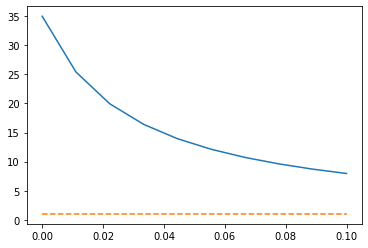

In [2]:
epsilon_values=np.linspace(0.0,0.1,10)
plt.plot(epsilon_values,35/(1+34*epsilon_values))
plt.plot(epsilon_values,np.ones(len(epsilon_values)),linestyle='dashed')

# Ejercicio 4 (Repaso + opcional)

Considerar una moneda de la que no se tiene ninguna información acerca de su estado. Es decir, no se sabe si la moneda está trucada, si cae preferentemente de un lado o del otro. Se quiere determinar la probabilidad, $\mu$, de que la moneda caiga de uno de los lados (digamos cara).

a. ¿Cuál sería un prior razonable para el parámetro $\mu$ dada esta información?

b. Se lanza la moneda N veces, y cae $c$ veces cara (C) y $e = N - c$ veces ceca (escudo, E). Escribir la función de verosimilitud para estos datos. ¿Qué función de distribución es la apropiada para modelar este proceso? ¿Cuál es el estimador de máxima verosimilitud, $\mu_{ML}$?

c. Si tomamos como prior una función uniforme, $Beta(1, 1)$, y dada la secuencia [E, E, C, E, C], calcular la posterior de $\mu$ y graficarla.

*d. Suponer ahora que en lugar de tratarse de una moneda completamente desconocida, supiéramos de alguna manera que el prior para $\mu$ es $P(\mu) = N(0.5, 0.02)$, donde $N$ es la distribución normal:
<ol>
    <li>Calcular y graficar la distribución posterior para el mismo set de datos del punto <em>c</em>.</li>
    <li>Inventar un set de resultados del experimento de lanzar la moneda que conduzcan a una posterior que permita refutar el prior.</li>
    </ol>
    
***

En este ejercicio modelamos una moneda cargada, que puede tener un resultado (cara) con probabilidad $\mu$ u otro (seca) con probabilidad $(1-\mu)$. Los resultados de la experimentación se dan por tirar la moneda una cantidad total $N$ de veces, de las cuales $X$ dio cara. La función de verosimilitud asociada (es decir $P((N,X)|\mu)$) es una Binomial(N,\mu). Como no sabemos nada sobre la moneda de antemano, cualquier valor de $\mu$ nos parece equiprobable asi que nuestro prior $P(\mu)$ es uniforme. Nuestro posterior $P(\mu | (N,X))$ esta dado por el teorema de Bayes:
$$
P(\mu\,|\,(N,X)) = \frac{P((N,X)\,|\,\mu) \times P(\mu)}{P(N,X)}
$$

La _evidencia_ $P(N,X)$ es un factor de normalización solamente, y nuestro prior es una constante $Uniform(\mu)=1$, por lo cual lo resumimos en
$$ P(\mu \,|\, (N,X) \propto P((N,X)\,|\,\mu) = Binomial (X,N,\mu) $$

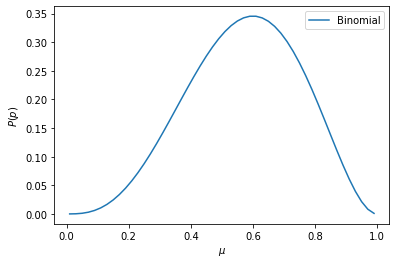

In [3]:
N=5
X=3
mu = np.linspace(0.01,0.99)
binomial = binom.pmf(X,N,mu)
plt.plot(mu,binomial, label='Binomial')
plt.legend()
plt.xlabel(r'$\mu$')
plt.ylabel(r'$P(p)$')
plt.show()

A esta distribución le falta la normalización: Prior / Evidence, que dijimos que eran constantes para un prior uniforme. Hay una manera muy elegante de obtener distribuciones normalizadas, que es la de utilizar un prior conjugado a nuestra verosimilitud. Si buscamos, para la Distribucion Binomial, el Prior Conjugado es la distribucion Beta. Esta es una familia de distribuciones, que parametrizamos con dos valores $\alpha$ y $\beta$. 

Lo que tiene es que si $$Prior \sim Beta(\alpha, \beta)$$ y la $$Verosimilitud \sim  Binomial (N, X)$$ entonces el posterior pertenecerá a la misma familia de distribuciones Beta, sera $$Posterior \sim Beta (\alpha', \beta')$$ con $$\alpha' = \alpha + X$$ y $$\beta' = \beta + (N-X)$$

Pero nosotros teniamos un prior uniforme, ¿pertenece este prior a la familia de funciones Beta? Si: Es la $Beta(1,1)$

Testeemos esto:

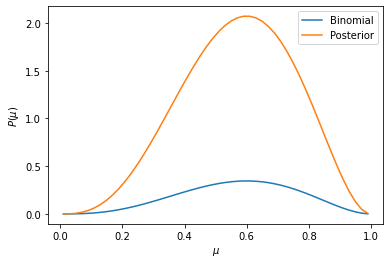

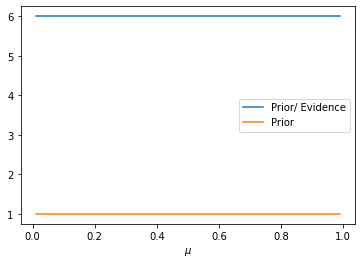

In [4]:
N=5
X=3
mu = np.linspace(0.01,0.99)
binomial = binom.pmf(X,N,mu)
posterior = beta.pdf(mu,1+X,1+N-X)
PriorOverEvidence = posterior/binomial
plt.plot(mu,binomial, label='Binomial')
plt.plot(mu,posterior, label = 'Posterior')
plt.legend()
plt.xlabel(r'$\mu$')
plt.ylabel(r'$P(\mu)$')
plt.show()
plt.plot(mu,PriorOverEvidence, label='Prior/ Evidence')
plt.plot(mu,uniform.pdf(mu), label='Prior')
plt.legend()
plt.xlabel(r'$\mu$')
plt.show()

## Opcional: Prior Gaussiano

Desafortunadamente, el prior Gaussiano no es el prior conjugado de la binomial, así que no podremos usar el truco de los prior conjugados. Pero podemos seguir haciendo lo primero:
$$ Posterior \propto Verosimilitud \times Prior$$
Y la evidencia es simplemente para que el posterior este normalizado, es decir que integrado de 1.

Hagamos esto para el set de datos que teniamos:

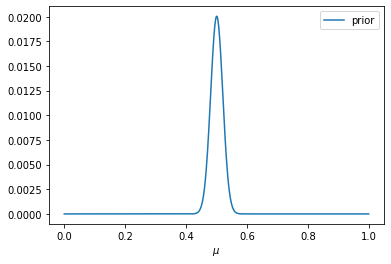

311.19089759999997


In [15]:
X = 3
N = 5

mu = np.linspace(0,1,1000)

prior = norm.pdf(mu,0.5,0.02)
verosimilitud = binom.pmf(X,N,mu)
posterior = prior*verosimilitud
evidencia = (prior*verosimilitud).sum()
posterior /= evidencia

#plt.plot(mu,prior, label='prior')
#plt.plot(mu,verosimilitud, label='verosimilitud')
plt.plot(mu,posterior, label='prior')
plt.legend()
plt.xlabel('$\mu$')
plt.show()

print(evidencia)

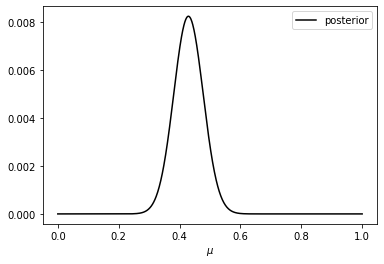

11.865622500000004


In [41]:
X = [3,2,1,0,4, 5]
N = 5

mu = np.linspace(0,1,1000)

for x in X:
    prior = norm.pdf(mu,0.4,0.05)
    vrs = binom.pmf(x,N,mu)
    post = prior*vrs
    evidencia = (prior*vrs).sum()
    post /= evidencia
    #plt.plot(mu, post, label=x)

#plt.plot(mu,prior, label='prior')
#plt.plot(mu,verosimilitud, label='verosimilitud')
plt.plot(mu, post, label='posterior', color='black')
plt.legend()
plt.xlabel('$\mu$')
plt.show()
print(evidencia)

Ahora, generemos un set de datos ficticio, correspondiente a una moneda trucada con $\mu=0.8$. Veamos cuantas veces tenemos que tirar la moneda hasta que estemos "convencidos" de que está trucada (es decir, de que $\mu \ne 0.5$ )

In [42]:
#Primero genero mi experimento. Supongamos un mu verdadero (que luego querré inferir cual es):
true_mu = 0.8
#Genero 1000 tiradas, es un proceso de Bernoulli. Esto es el experimento.
N_max = 10000
tiradas = bernoulli.rvs(true_mu, size=N_max)
#este vector son 1 o 0 (caras o secas). La cantidad de caras las puedo sacar simplemente sumando con .sum().
print(tiradas)

[1 1 0 ... 1 1 1]


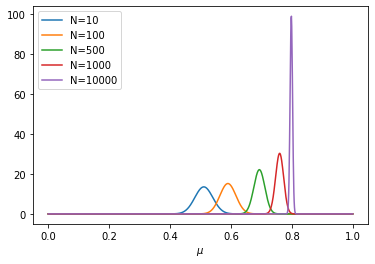

In [43]:
#Esto es para samplear
mu = np.linspace(0.,1.,num=1000,endpoint=False)

#prior normal:
prior = norm.pdf(mu,0.5,0.03)
#plt.plot(p,prior, label='prior')

#Ahora vamos experimentando. Vamos sumando tiradas en 5 pasos.
for N in [10,100,500,1000, N_max]:
    #Numero de eventos que salio cara:
    X = tiradas[:N].sum()
    #verosimilitud binomial
    verosimilitud = binom.pmf(X,N,mu)
    #posterior no normalizado
    posterior = prior*verosimilitud
    #calculo el area bajo la curva (son 1000 puntos equiespaciados)
    evidence = posterior.sum()*0.001
    #normalizo el posterior
    posterior = posterior/evidence
    #ploteo
    plt.plot(mu,posterior, label='N={}'.format(N))
    
#plt.axvline(true_p, label='p real')
plt.legend()
plt.xlabel('$\mu$')
plt.show()

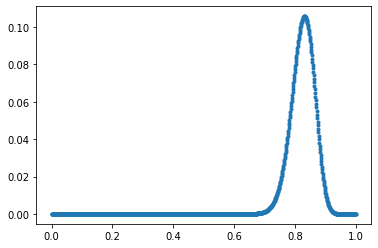

In [44]:
#Esto es para samplear
mu = np.linspace(0.,1.,num=1000,endpoint=False)

#prior normal:
prior = norm.pdf(mu,0.5,0.1)
#plt.plot(mu, prior)
X = tiradas[:100].sum()
verosimilitud = binom.pmf(X,100,mu)
plt.plot(mu, verosimilitud, '.')
#print(mu)
#print(prior)

Ahora, podemos plotear tambien cual es la probabilidad de que $\mu>0.5$. Esta probabilidad deberia dar ~0.5 para una moneda justa, si da mucho menos o mucho mas, probablemente este trucada (con $\mu>0.5$ o $\mu<0.5$ respectivamente).

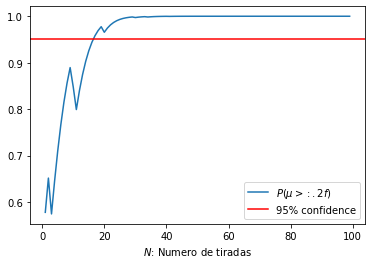

In [47]:
mu_threshold = 0.5
prob = []
mu = np.linspace(0.,1.,num=1000,endpoint=False)
N_range = range(1,100)
for N in N_range:
    #Numero de eventos que salio cara:
    X = tiradas[:N].sum()
    #verosimilitud binomial
    verosimilitud = binom.pmf(X,N,mu)
    #posterior no normalizado
    posterior = prior*verosimilitud
    #calculo el area bajo la curva (son 1000 puntos equiespaciados)
    evidence = posterior.sum()*0.001
    #normalizo el posterior
    posterior = posterior/evidence
    #probabilidad de que p>p_threshold
    prob.append(posterior[mu>mu_threshold].sum()*0.001)

    
plt.plot(N_range,prob, label = '$P(\mu > {:.2f})$')
plt.xlabel('$N$: Numero de tiradas')
plt.axhline(0.95, label='95% confidence', c='red')
plt.legend()
plt.show()

# Ejercicio 5:

Supongamos que se quiere ser insoportable en un evento social. He aquí una útil guía para lograrlo. El primer paso es, tras interrumpir todas las conversaciones, recopilar los cumpleaños de todos los presentes. Con eso, y utilizando la probabilidad y la estadistica, uno puede tratar de quedar bien mientras molesta a todos. Lo primero que necesita es:

a. ¿Cuál es la probabilidad de que en una reunión de N personas haya al menos 2 que cumplen el mismo día?

b) Sabiendo esto, elije una persona al azar, y cumple el 3 de Marzo. ¿Qué probabilidad hay de que eligiendo otra persona al azar, esta cumpla el mismo día?

c. ¿Si en medio del show entra otra persona al evento, que probabilidad tiene de cumplir el mismo día que alguno de los participantes?

d. Supongamos que usted es un desvelado y no sabe en que planeta está. Una manera de comprobarlo es comprobar si de los N participantes, existen al menos 2 que cumplen el mismo día. Sabiendo esto, ¿cómo inferiria cuánto dura el año en ese planeta? <b>Tip:</b> Utilicé la verosimulitud y el posterior.
***

a) Para el item a., hay muchas maneras de hacerlo númericamente. Análiticamente, el razonamiento más usual es el siguiente.

Denotemos $A = M \geq 2$ personas cumplen el mismo día. 
Si $N > 365$, entonces $P(A) = 1$.
Si $N \leq 365$, entonces es más fácil pensar la probabilidad de que ninguna persona cumpla el mismo día. Este evento es el complementario a $A$ y por lo tanto lo puedo llamar $P(-A) = 1 - P(A)$.

Para encontrar $P(-A)$ sigo una breve receta:

<ol>
    <li>Elijo un día al azar, con probabilidad 1/365. Como puede ser cualquier día, multiplico por 365. Esto fue una manera complicada de que la primer persona que elija tiene probabilidad 1 de cumplir algún día.</li>
    <li>La siguiente persona va a tener probabilidad 364/365 de cumplir otro día. La probabilidad de que ambos sucesos co-ocurran es $\frac{365}{365}\frac{364}{365}$.</li>
    <li>Repito esto hasta tener en cuenta las $N$ personas de la habitación y tengo $P(-A) = \prod_{i=1}^{N}\frac{365-(N-1)}{365}$.
        <li>Reordenando un poco, $P(-A) = \frac{365!}{365^{N}(365-N)!}$ </li>
    </ol>


$P(A)$ puede plotearse en función de N y ver cuantas personas se necesitan para que haya un 50% de chances de que al menos dos cumplan el mismo día.

Text(0, 0.5, 'P(A)')

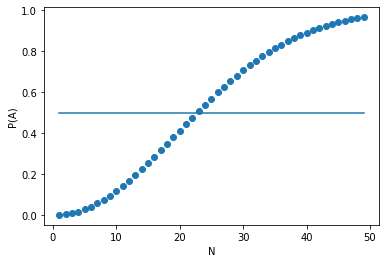

In [38]:
def prob_cumpl(N):
    return 1-math.factorial(365)/(math.factorial(365-N)*365**N)

Numero_de_gente=np.arange(1,50,1)
prob=0.5
ProbA=list(map(lambda n: prob_cumpl(int(n)),Numero_de_gente))
plt.scatter(Numero_de_gente,ProbA)
plt.plot(Numero_de_gente,prob*np.ones(len(Numero_de_gente)))
plt.xlabel('N')
plt.ylabel('P(A)')

b) Este item pide calcular la probabilidad de que dos personas cumplan un <b>determinado</b> día. Aquí ya no hago más la suma sobre todos los días y tengo que, si una persona cumple el 3 de Marzo, la probabilidad de que alguna otra de las $N-1$ personas lo haga es $1-\left(\frac{364}{365}\right)^{N-1}$

c) Acá el problema parece ligeramente distinto pero no lo es. La probabilidad es la misma que en el item b.

d) El teorema de Bayes nos dice que la probabilidad de que el año dure D días dado que al menos 2 de las N personas cumplen el mismo día es:

$P(D|A,N) = \frac{P(A|D,N)}{P(A|N)}P(D)$

Donde la verosimilitud $P(A|D,N)$ es la probabilidad de que al menos 2 personas cumplan el mismo día dado $N$ personas y $D$ días. Reescribiendo el resultado del item a)

$P(A|D,N) = 1-\frac{D!}{D^{N}(D-N)!}$ si $N \leq D$ y 1 si $N > D$.

Hacer inferencia análitica sobre esto no es posible (o yo no lo pude hacer). Sin embargo, este problema puede resolverse númericamente recordando que $P(A|N) \sum_{D} P(A|D,N)P(D) = \sum_{D} D$ y el Prior es donde vamos a poner nuestro sesgo. Por ejemplo, voy a tomar un prior uniforme entre 200 y 450 días. Veamos como evoluciona el posterior para distintos tipos de mediciones.

In [ ]:
#Esto es para samplear

D = np.arange(200,451,1)

#Defino la función verosimilitud para un determinado M,N,D

def verosimilitud(N,D):
    if(N<D+1):
        return 1-math.factorial(D)/(math.factorial(D-N)*D**N)
    else:
        return 1.0
prior = 1/D.sum()

#Ahora vamos experimentando. Vamos sumando tiradas en 10 pasos.
for N in [10,20,30,40,50]:
    #posterior no normalizado
    posterior = np.asarray(list(map(lambda x: verosimilitud(int(N),int(x))*prior, D)))
    #calculo el area bajo la curva
    evidence = posterior.sum()
    #normalizo el posterior
    posterior = posterior/evidence
    #ploteo
    plt.plot(D,posterior, label='N={}'.format(N))
    
#plt.axvline(true_p, label='p real')
plt.legend()
plt.xlabel('$D$')

Se ve entonces que si tengo un N bajo y aparecen al menos dos personas que cumplen el mismo día, esto favorece muchisimo a la hipotesis de D pequeño. Si aumento el $N$, entonces todos los $D$ comienzan a ser muy equiprobables.

# Ejercicio 6: A/B Testing

Te contratan como diseñador de sitios web para una prestigiosa revista amarillista. Tu principal tarea es rediseñar el sitio para obtener más suscriptores. Luego de retoques y maquillajes, crees que esta lista, pero antes de hacerla oficial tu jefe quiere que realices un experimento para estimar qué tanto mejor (si es que lo es en absoluto) es tu diseño, respecto al anterior. 

Se realiza el siguiente experimento: Al 20% de los visitantes se les muestra tu novedoso diseño (diseño A) mientras que al resto se les muestra el diseño original (diseño B). Luego de un mes, cuentas con los siguientes datos:

|Sitio:|A|B|
|---|---|---|
|Cantidad de visitantes  | 14 400  | 57 600  |
|Cantidad de suscriptores| 20  |  68 |

***

Cada vez que tenemos un experimento cuyo output es binario (si o no, cara o seca, funciona o no funciona) y del cual no tenemos ningun otro input mas que ese resultado, lo unico que podemos modelar es la probabilidad de obtener uno de los resultados, y esto se modela con la Binomial.

En nuestro problema, queremos testear dos diseños de sitios web y comparar cual de los dos conduce al mayor número de suscripciones. (Esto mismo podria ser testear dos drogas para ver cual conduce al mayor numero de pacientes curados, testear dos métodos de enseñanza y ver cual conduce al mayor número de aprobados, etc.). Como dijimos, sin más input que un resultado binario de cada experimento, todos estos problemas son indistinguibles del de la moneda cargada. Si les es más sencillo, este problema podría ser comparar dos monedas (diseños de sitios web), para ver cuál es más probable que de "cara" (un visitante se suscriba) dado datos N tiradas de moneda (N visitantes)

Para cada sitio web tenemos:
* Parámetro a modelar: $p$, probabilidad de que un visitante se suscriba
* Datos: $N$ visitantes, de los cuales $X$ se suscribieron
* Modelo: Likelihood Binomial, Prior uniforme (Beta(1,1))
* Inferencia: La distribución del parámetro $p$ esta dada por un Posterior=Beta$(1+X, 1+N-X)$


##  a)

**Modele la probabilidad $p$ de que un visitante al sitio web se suscriba a la revista (i.e. la _Verosimilitud_ o _Likelihood_). ¿Qué distribución utilizaría y porqué?**

R: Una Binomial, ya que es un experimento con solo dos posibles resultados, que esta parametrizado por la probabilidad de cada uno de ellos ($p$ y $(1-p)$)

## b)
**Si llamamos $p_A$ y $p_B$ a dichas probabilidades cuando el visitante es mostrado el diseño A o el diseño B, modele la confianza que tiene en los valores de $p_A$ y $p_B$ antes de realizar el experimento (i.e. el _prior_). ¿Qué distribución usa?**

R: Si no tengo idea de nada sobre el sitio web, uso un prior uniforme, asi no doy mayor peso a ningun $p$

_ACLARACIÓN: ESTO PODRÍA SER DIFERENTE SI CONTÁRAMOS CON DATOS PREVIOS DEL DESEMPEÑO DEL SITIO (e.g. 1 de cada 1000 visitantes se suscribe) ESTA INFORMACIÓN SE PUEDE PONER EN UN PRIOR ADECUADO_

## c)
**Utilice el Teorema de Bayes para estimar la confianza que tiene en los parámetros $p_A$ y $p_B$ luego de realizar el experimento (i.e. el _posterior_). Grafíquelas en función del valor de p.**

_Ayuda: Esto se puede hacer analiticamente si su verosimilitud y su prior son conjugados, por ejemplo Beta$(1,1)\times$Binomial(X positivos de N intentos) ~ Beta(1+X, 1+N-X)._

R:
Escribimos los datos de ambos sitios

In [39]:
N_A = 14400
X_A = 20

N_B = 57600
X_B = 68 

Definimos los parámetros de nuestros priors:

In [40]:
alpha_A = 1
beta_A  = 1

alpha_B = 1
beta_B  = 1

Definimos nuestros posteriors (aquí directamente los defino como una instancia la clase `Beta`, de la cual luego podemos acceder a los métodos `.pdf()`, `.rvs()`, etc.)

In [41]:
posterior_A = beta(alpha_A + X_A, beta_A + N_A - X_A)
posterior_B = beta(alpha_B + X_B, beta_B + N_B - X_B)

Ahora puedo graficar los posteriors:

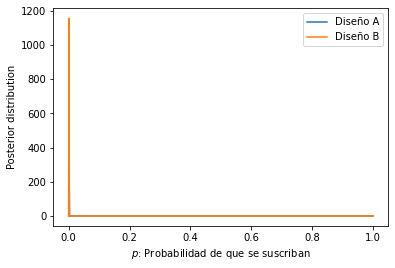

In [42]:
p = np.linspace(0,1,1000)

plt.plot(p, posterior_A.pdf(p), label='Diseño A')
plt.plot(p, posterior_B.pdf(p), label='Diseño B')
plt.legend()
plt.xlabel('$p$: Probabilidad de que se suscriban')
plt.ylabel('Posterior distribution')
plt.show()

Hagamos zoom a esta región:

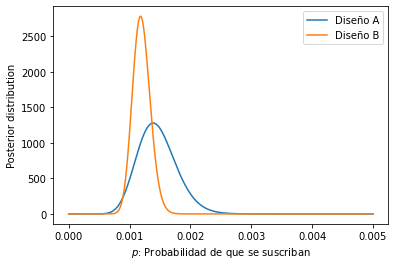

In [43]:
p = np.linspace(0,0.005,1000)

plt.plot(p, posterior_A.pdf(p), label='Diseño A')
plt.plot(p, posterior_B.pdf(p), label='Diseño B')
plt.legend()
plt.xlabel('$p$: Probabilidad de que se suscriban')
plt.ylabel('Posterior distribution')
plt.show()

## c)
**¿Cual es la probabilidad de que el diseño A sea mejor que el B? (Recuerde que un 50% quiere decir que son estadisticamente iguales)**

R:
En los gráficos de recién vemos que para el diseño A la distribución mas ancha, relacionado al hecho que menos gente lo visitó (recordemos que solo al 20% de los visitantes se les mostraba este diseño), pero parece estar más tirado hacia $p$ más altos. Cuantifiquemos esto. Podemos definir distintos estimadores: Media, Mediana, Maximo

In [44]:
print("Media\n A : {:.3f} %\n B : {:.3f}%\n\n".format(posterior_A.mean()*100, posterior_B.mean()*100 ))
print("Mediana\n A : {:.3f} %\n B : {:.3f}%\n\n".format(posterior_A.median()*100, posterior_B.median()*100 ))
print("Maximo\n A : {:.3f} %\n B : {:.3f}%\n\n".format(p[posterior_A.pdf(p).argmax()]*100, p[posterior_B.pdf(p).argmax()]*100 ))

Media
 A : 0.146 %
 B : 0.120%


Mediana
 A : 0.144 %
 B : 0.119%


Maximo
 A : 0.139 %
 B : 0.118%




Si no tuvieramos las funciones implementadas, podemos simplemente muestrear la distribucion y calcularlo de ahí. El método `.rvs()` nos devuelve valores que siguen la distribución dada por el posterior:

In [45]:
sample_size = 100000 #Muchas, para que no tengamos errores de binneo numerico
sample_A = posterior_A.rvs(size=sample_size)
sample_B = posterior_B.rvs(size=sample_size)

In [46]:
print("Media\n A : {:.3f} %\n B : {:.3f}%\n\n".format(sample_A.mean()*100, sample_B.mean()*100 ))
print("Mediana\n A : {:.3f} %\n B : {:.3f}%\n\n".format(np.median(sample_A)*100, np.median(sample_B)*100 ))

Media
 A : 0.146 %
 B : 0.120%


Mediana
 A : 0.143 %
 B : 0.119%




Para el maximo, deberiamos primero hacer un histograma de nuestro sample, y allí ver el bin mas alto:

In [47]:
histogram_A, bins_A = np.histogram(sample_A,100, density=True)
histogram_B, bins_B = np.histogram(sample_B,100, density=True)
bins_A = (bins_A[1:] + bins_A[:-1])/2
bins_B = (bins_B[1:] + bins_B[:-1])/2

max_A = bins_A[np.argmax(histogram_A)]
max_B = bins_B[np.argmax(histogram_B)]

print("Maximo\n A : {:.3f} % +- {:.3f} %\n B : {:.3f}%+- {:.3f} %\n\n".format(max_A*100,bins_A[1]-bins_A[0], max_B*100, bins_B[1]-bins_B[0]))

Maximo
 A : 0.143 % +- 0.000 %
 B : 0.118%+- 0.000 %




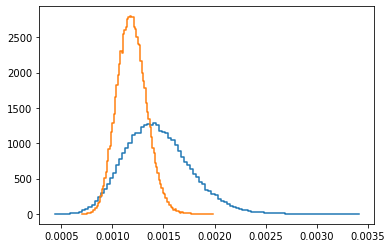

In [48]:
#Ploteemos el histograma para chequear que esta todo bien
plt.step(bins_A, histogram_A, label='A')
plt.step(bins_B, histogram_B, label='B')

Todo parece indicar que el nuevo diseño A es mejor que el B (todos los indicadores dan por encima), pero eso no nos deja mejor que cualquier frecuentista... 

Teniendo toda la info del posterior, podemos calcular la probabilidad de que el sitio web A sea mejor que el B. Es decir, de nuestro sample enorme, con qué frecuencia es $p_A > p_B$??? 

_(NOTA: Como podemos samplear tan grande como querramos, esta frecuencia se puede aproximar a la probabilidad que buscamos tanto como querramos)_

In [50]:
(sample_A>sample_B).mean()

0.76503

Es decir, en un 77% de los casos, el diseño A es mejor que el diseño B ("mejor": mas chance que el visitante se suscriba).

Otra manera de decirlo, tenemos un 76.8% de confianza en que el nuevo diseño (A) es mejor que el viejo (B). ¿No es suficiente? Solo es cosa de mejorar la estadística (con mas visitas, los picos se harán más angostos y esta probabilidad se acercará más al 100% )

Este es un numero que le podemos comunicar a nuestro jefe y pedir un aumento.

## e)
**Si el sitio cuenta con un promedio de 5 millones de visitas anuales, ¿cuánto estima que será el incremento en los suscriptores el proximo año debido a usar el diseño nuevo en vez del original?**

R:
Bueno, dado que tenemos la probabilidad de que un usuario se suscriba, podemos estimar cuantas suscripciones tenemos en un año. Si lo hacemos para los dos sitios, la diferencia nos dirá el incremento.

### Modo 1: Usando un estimador
La forma mas sencilla es usando un estimador para el posterior. Por ejemplo, el promedio:

In [51]:
p_medio_A = posterior_A.mean()
p_medio_B = posterior_B.mean()

N = 5*10**6

suscripciones_A = N*p_medio_A
suscripciones_B = N*p_medio_B
print("Con el diseño A se suscribirian {} personas en el año".format(int(suscripciones_A)))
print("Con el diseño B se suscribirian {} personas en el año".format(int(suscripciones_B)))
print("Esperamos un incremento anual de {} suscripciones gracias a usar el nuevo diseño".format(int(suscripciones_A-suscripciones_B)))

Con el diseño A se suscribirian 7290 personas en el año
Con el diseño B se suscribirian 5989 personas en el año
Esperamos un incremento anual de 1301 suscripciones gracias a usar el nuevo diseño


### Modo 2: Usando toda la información y el poder del posterior.

De nuevo, al usar un estimador estamos ignorando toda la información que tenemos disponible en la forma de nuestro posterior. Algo mejor sería utilizar el valor de espectación de la cantidad de queremos. Utilizaremos nuestros samples para hacer esto:

In [52]:
sample_size = 100000 #Muchas, para que no tengamos errores de binneo numerico
sample_A = posterior_A.rvs(size=sample_size)
sample_B = posterior_B.rvs(size=sample_size)

suscripciones_A = (N*sample_A).mean()
suscripciones_B = (N*sample_B).mean()
print("Con el diseño A se suscribirian {} personas en el año".format(int(suscripciones_A)))
print("Con el diseño B se suscribirian {} personas en el año".format(int(suscripciones_B)))
print("Esperamos un incremento anual de {} suscripciones gracias a usar el nuevo diseño".format(int(suscripciones_A-suscripciones_B)))

Con el diseño A se suscribirian 7291 personas en el año
Con el diseño B se suscribirian 5993 personas en el año
Esperamos un incremento anual de 1297 suscripciones gracias a usar el nuevo diseño


En este caso, como $suscriptores=N*p$ es lineal en p, el valor de expectación da lo mismo que tomar el promedio. Pero para cantidades no lineales, puede haber una diferencia significativa.

# Ejercicio 7

Supongamos que has diseñado un nuevo test para una enfermedad. Ahora hay que caracterizarlo. Para esto, se suele subdividir el espacio de posibilidades en 4:

*   Verdadero Positivo: El test da positivo en un paciente enfermo.
*   Falso Positivo: El test da positivo en un paciente sano.
*   Verdadero Negativo: El test da negativo en un paciente sano
*   Falso Negativo: El test da negativo en un paciente enfermo.

Dado que cualquier paciente puede estar o sano o enfermo, y que el test solo puede dar positivo o negativo, estos cuatro eventos completan el espacio de posibilidades y son excluyentes. De este modo se caracteriza el test con las probabilidades de cada uno de estos eventos.
***

En un problema con resultados binarios $X_1$ y $X_2$ dados con frecuencias $p$ y $(1-p)$, la cantidad de veces que ocurre el evento $X_1$ en $N$ intentos sigue una distribución `Binomial(N,p)`. Si generalizamos al caso de N resultados posibles $X_1,\dots,X_N$ descriptos por frecuencias $p_1,\dots,p_N$ (tales que $1 = \sum_{i=1}^N p_i$), la cantidad de veces que ocurre cada uno de los $X_i$ eventos está descripta por una distribución `Multinomial(N,p1,...,pN)`

En nuestro problema, tenemos una prueba médica que se realiza sobre la población. En nuestro experimento, tenemos cuatro tipos de sucesos: Falsos Positivos (cuando el paciente esta sano pero el test da positivo), Falsos Negativos (cuando el paciente esta enfermo pero el test da negativo), Verdaderos Positivos (cuando el paciente esta enfermo y el test da positivo) y Verdaderos Negativos (cuando el paciente esta sano y el test da negativo). Para caracterizar el test, necesitamos inferir la probabilidad de cada uno de estos eventos.  Para esto usamos una distribución Multinomial.

* Verosimilitud: Multinomial

Ahora, nuestro prior será nuevamente uno uniforme, ya que no sabemos nada sobre el test. En la ayuda nos dicen que la Multinomial tiene un prior conjugado, llamado Dirichlet, que está implementado en Scipy.Stats. Joya. Resulta que `Dirichlet(1,1,1,1)` es la distribución uniforme, así que sabemos que nuestro posterior será una Dirichlet.

* Prior: Dirichlet$(1,1,1,1)$ = Uniforme

* Datos: N experimentos, en una tabla, que nos dan ocurrencias X_1, X_2, X_3 y X_4

* Posterior: Dirichlet$( 1 + X_1, 1+X_2, 1+X_3, 1+X_4)$

## a)
** Realice inferencia Bayesiana sobre las probabilidades del modelo. Grafique los posteriors correspondientes, y reporte un valor (estimador) para ellos**

In [53]:
#Si estas en Colab, ejecuta esto primero:
!mkdir datasets
!wget https://raw.githubusercontent.com/exord/UNSAM_IA/master/datasets/clinical_trials.csv
!mv clinical_trials.csv datasets/clinical_trials.csv

mkdir: no se puede crear el directorio «datasets»: El archivo ya existe
--2020-04-27 15:34:57--  https://raw.githubusercontent.com/exord/UNSAM_IA/master/datasets/clinical_trials.csv
Resolviendo raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.216.133
Conectando con raw.githubusercontent.com (raw.githubusercontent.com)[151.101.216.133]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 63954 (62K) [text/plain]
Guardando como: “clinical_trials.csv”

clinical_trials.csv 100%[===================>]  62,46K  --.-KB/s    en 0,1s    

2020-04-27 15:34:58 (477 KB/s) - “clinical_trials.csv” guardado [63954/63954]



Comenzamos leyendo los datos:

In [55]:
df = pd.read_csv('datasets/clinical_trials.csv', index_col='PatientID')
df.head()

,TruePositive,FalsePositive,TrueNegative,FalseNegative
PatientID,,,,
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


Vemos que las columnas tienen un 1 en el caso correspondiente. Sumemos todas las filas, para tener la cantidad total de casos, que es lo que nos interesa

In [56]:
#alphas = df.iloc[:50].sum(axis=0) #para seleccionar menos filas y experimentar con dataset mas pequeño
alphas = df.sum(axis=0)
print(alphas)
alphas = np.array(alphas.data)

TruePositive       45
FalsePositive     430
TrueNegative     4499
FalseNegative      26
dtype: int64


Ahora podemos calcular nuestro posterior. El argumento `alphas` debe ser un array de cuatro elementos, cada uno es 1 + la cantidad de casos correspondientes. Lo podemos abreviar en 1+alphas

In [68]:
posterior = dirichlet(alphas+1)
print(posterior)

Este posterior es una distribución multivariada, ya que depende de 4 parámetros. Podemos calcular, por ejemplo, la densidad de probabilidad en el caso que la tasa de verdaderos positivos sea 0.01 , la de falsos positivos 0.08, la de Verdaderos Negativos 0.9 y la de falsos negativos 0.01 de la siguiente manera:

In [58]:
#recuerda que tienen que sumar 1
posterior.pdf([0.01, 0.08 , 0.9, 0.01])

2764.309821684793

Dada la dimensionalidad del problema, probablemente querramos graficar el posterior en funcion de un solo parametro, marginalizando sobre los otros 3. Para que esto sea mas sencillo, conviene muestrear el espacio de parametros y trabajar con las muestras.

Podemos generar muestras de ellos, con `rsv()`

In [70]:
posterior.rvs()

array([[0.00712099, 0.08058361, 0.90559524, 0.00670017]])

Entonces, generemos un (no tan grande porque se tilda) de estos, y miremos los distintos valores

In [60]:
sample_size = 100**3 #el espacio tiene 3 dimensiones, de esta forma tenemos approx mil por dimension

samples = posterior.rvs(size=sample_size)


In [61]:
histogram, bins = np.histogramdd(samples)

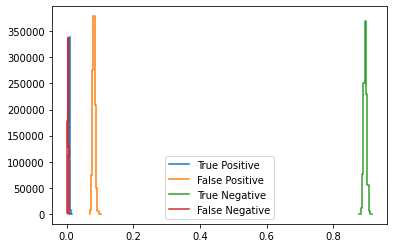

In [62]:
plt.step(bins[0][:-1], histogram.sum(axis=(1,2,3)), label ='True Positive')
plt.step(bins[1][:-1], histogram.sum(axis=(0,2,3)), label ='False Positive')
plt.step(bins[2][:-1], histogram.sum(axis=(0,1,3)), label ='True Negative')
plt.step(bins[3][:-1], histogram.sum(axis=(0,1,2)), label ='False Negative')
plt.legend()

Para buscar un estimador, podemos simplemente tomar el promedio, que como está implementado no hace falta muestrear (que vemos que toma tiempo):

In [63]:
promedios = posterior.mean()
print("TP : {:.2f} %\nFP : {:.2f} %\nTN : {:.2f} %\nFN : {:.2f} %\n".format(*(promedios*100)))

TP : 0.92 %
FP : 8.61 %
TN : 89.93 %
FN : 0.54 %



Podemos corroborar que coincide con los valores muestreados:

In [64]:
samples.mean(axis=0)*100

array([ 0.91919499,  8.6127824 , 89.92833047,  0.53969214])

## b) 
**Usted se realiza dicho test y da positivo. Utilizando la información anterior ¿Cuál es la probabilidad de que estés enfermo?**

**DATO:** En la muestra de los resultados anteriores, la población enferma estaba sobrerepresentada para obtener una mejor estimación de falsos negativos y verdaderos positivos. Suponga que la probabilidad real de que alguien en su condición tenga la enfermedad es del 0.1%.

R: Usaremos el teorema de Bayes
$$P(E | +) = P(+ | E) * P(E) / P(+)$$

* $P(+ | E)$ es la tasa de verdaderos positivos: 0.0092, parece chica pero es porque hay que normalizarla por la evidencia $P(+)$
* $P(E)$ me dicen que es 0.1%, o sea 0.001
* $P(+)$ la evidencia. De acuerdo a la regla de la suma es $P(+|S) P(S) + P(+|E) * P(E)$. Sabemos que $P(S)=1-P(E)$ asi que lo unico que me falta saber es $P(+|S)$ que es la tasa de falsos positivos: 8.61%.

In [65]:
TP = promedios[0]
FP = promedios[1]
pE = 0.001

evidence = ( FP *(1-pE) + TP * pE )

P_estoy_enfermo = TP * pE / evidence
print("Probabilidad de que este enfermo: {:.3f}%".format(P_estoy_enfermo*100))

Probabilidad de que este enfermo: 0.011%


## c)
**¿Cambia el resultado anterior si utilizas las distribuciones de posterior en lugar de los estimadores escogidos? ¿Porqué?**

Veamos

In [78]:

TP = samples[:,0]
FP = samples[:,1]
pE = 0.001

evidence = ( FP *(1-pE) + TP * pE )

P_estoy_enfermo_2 = TP * pE / evidence
print("Probabilidad de que este enfermo: {:.3f}%".format(P_estoy_enfermo_2.mean()*100))

Probabilidad de que este enfermo: 0.011%


In [79]:
print("diferencia relativa: {:.2f}%".format((P_estoy_enfermo_2.mean()/P_estoy_enfermo-1)*100))

diferencia relativa: 0.23%


Estamos tomando el valor de expectación de una función que no es lineal en las probabilidades (el denominador de la evidencia lo hace no lineal). Sin embargo, como tenemos muchos datos, los posterior sos bastante picudos en torno a sus valores medios, por lo cual el resultado no difiere mucho.
Si repetimos el experimento, pero solo tomando las primeras filas de nuestros datos (con un `df.iloc([:50])` por ejemplo), obtendremos posteriors mas anchos y allí si se notará la diferencia.

Cuando tenemos pocos datos, la incerteza asociada queda codificada en el posterior y nos permite obtener mejores estimaciones, que simplemente usando un estimador. 